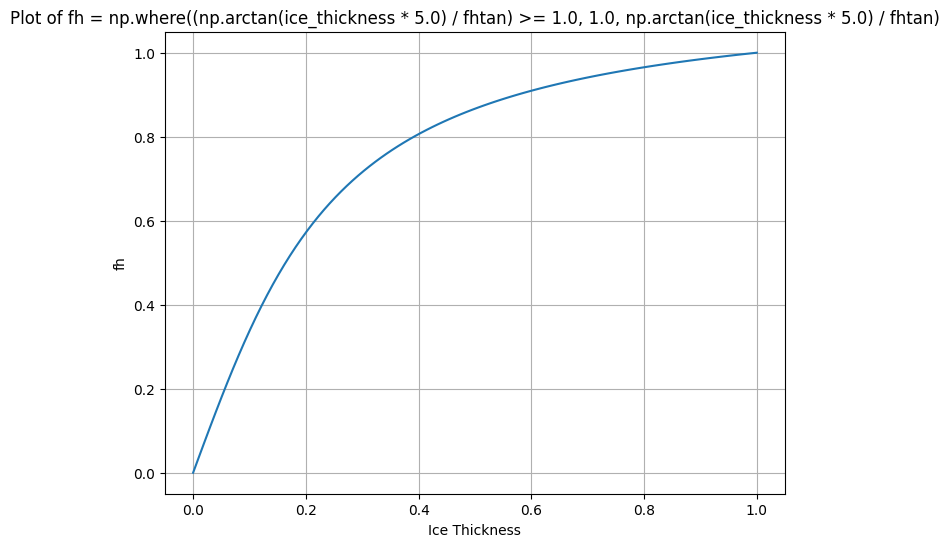

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define ahmax (maximum ice thickness)
ahmax = 1.0  

# Define ice_thickness as a numpy array from 0 to 1 with 100 points
ice_thickness = np.linspace(0, 1, 100)

# Calculate fhtan
fhtan = np.arctan(5 * ahmax)

# Calculate fh
fh = np.where((np.arctan(ice_thickness * 5.0) / fhtan) >= 1.0, 1.0, np.arctan(ice_thickness * 5.0) / fhtan)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(ice_thickness, fh)
plt.xlabel('Ice Thickness')
plt.ylabel('fh')
plt.title('Plot of fh = np.where((np.arctan(ice_thickness * 5.0) / fhtan) >= 1.0, 1.0, np.arctan(ice_thickness * 5.0) / fhtan)')
plt.grid(True)
plt.show()


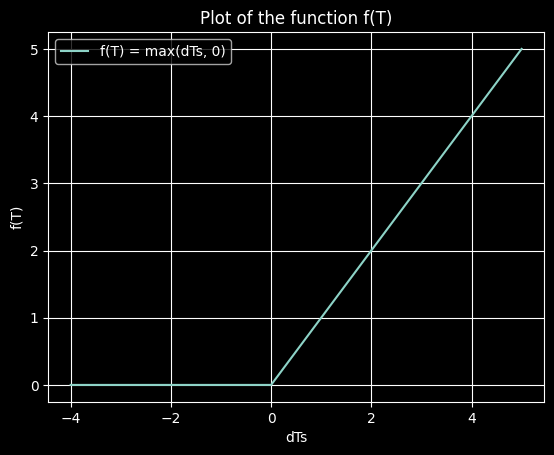

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for dTs
dTs = np.linspace(-4, 5, 100)

# Since dT_melt is 0.0, the function simplifies to max(dTs, 0)
fT = np.maximum(dTs, 0)

# Plot the function
plt.plot(dTs, fT, label='f(T) = max(dTs, 0)')
plt.xlabel('dTs')
plt.ylabel('f(T)')
plt.title('Plot of the function f(T)')
plt.legend()
plt.grid(True)
plt.show()